# **Data Understanding**

In [192]:
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# set max_columns to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 90)

# Read in the data
df = pd.read_csv('../data/raw/Supermarket Customers.csv', delimiter='\t')

In [193]:
df.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [194]:
df.describe()

,id,yearbirth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [195]:
df.columns

Index(['id', 'yearbirth', 'education', 'maritalstatus', 'income', 'kidhome',
       'teenhome', 'dtcustomer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [196]:
# show data description
print(f"Jumlah Baris,Kolom : {df.shape}")
cols = ['id', 'yearbirth', 'education', 'maritalstatus', 'income', 'kidhome',
       'teenhome', 'dtcustomer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']
pd.DataFrame({
    'data_type': df[cols].dtypes.values,
    'null_value': df[cols].isna().sum(),
    'Percentange': df[cols].isna().mean().values * 100,
    'n_unique': df[cols].nunique().values,
    'sample_unique': [df[col].unique() for col in cols]}
)

Jumlah Baris,Kolom : (2240, 29)


,data_type,null_value,Percentange,n_unique,sample_unique
id,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 256..."
yearbirth,int64,0,0.000000,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1..."
education,object,0,0.000000,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
maritalstatus,object,0,0.000000,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
income,float64,24,1.071429,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648..."
kidhome,int64,0,0.000000,3,"[0, 1, 2]"
teenhome,int64,0,0.000000,3,"[0, 1, 2]"
dtcustomer,object,0,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 0..."
recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0..."
mntwines,int64,0,0.000000,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86..."


# **Data Cleaning**

## Handling Wrong Datatype
After investigating the data, we found that there are some wrong datatype in the dataset. We will fix it in this section.

In [197]:
df['dtcustomer'] = pd.to_datetime(df['dtcustomer'], format='%d-%m-%Y')
df['dtcustomer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: dtcustomer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


## Handling Invalid Values

In [198]:
# Show Count Values For Each Columns
for col in df.columns:
    print(f"Column : {col}")
    print(f"{df[col].value_counts().sort_index()}")
    print()

Column : id
id
0        1
1        1
9        1
13       1
17       1
20       1
22       1
24       1
25       1
35       1
48       1
49       1
55       1
67       1
73       1
75       1
78       1
87       1
89       1
92       1
113      1
115      1
123      1
125      1
143      1
146      1
153      1
158      1
164      1
175      1
176      1
178      1
182      1
193      1
194      1
195      1
199      1
202      1
203      1
213      1
217      1
221      1
231      1
232      1
234      1
236      1
238      1
241      1
246      1
247      1
252      1
254      1
255      1
257      1
263      1
269      1
271      1
273      1
274      1
286      1
291      1
295      1
304      1
309      1
310      1
313      1
322      1
326      1
332      1
339      1
340      1
347      1
359      1
361      1
367      1
368      1
375      1
378      1
380      1
387      1
405      1
425      1
433      1
437      1
448      1
450      1
451      1
453      1
454      1
455   

After Investigation i found random sizes in **id** column where the size is not 5 digits, so to convert it into 5 random integer

In [199]:
import random

df['id'] = df['id'].astype(str)

list_values_string_same5 = df.loc[df['id'].str.len() == 5, 'id'].unique()
list_values_string_below5 = df.loc[df['id'].str.len() < 5, 'id'].unique()

# Generate unique random integers between 12000 and 14000
random_integers = random.sample(range(12000, 14001), len(list_values_string_below5))

# Create a dictionary to map old IDs to new random integers
id_map = dict(zip(list_values_string_below5, random_integers))

# Replace old IDs with new random integers in 'id' column
df['id'] = df['id'].replace(id_map)

# Convert 'id' column from str to int
df['id'] = df['id'].astype(int)

This is the result

In [200]:
# List all unique values in the 'id' column vertically
unique_values = df['id'].unique()
unique_values.sort()
for value in unique_values:
    print(value)
print('Total unique values:', len(unique_values))

10001
10010
10022
10031
10032
10033
10037
10057
10061
10065
10067
10069
10084
10089
10091
10092
10095
10099
10102
10104
10120
10127
10128
10129
10133
10140
10141
10142
10144
10146
10150
10151
10156
10157
10159
10160
10163
10164
10172
10175
10176
10177
10196
10203
10207
10212
10219
10232
10236
10240
10241
10242
10245
10250
10258
10260
10262
10264
10270
10277
10281
10286
10299
10304
10307
10311
10313
10314
10319
10323
10339
10340
10341
10343
10350
10352
10356
10364
10377
10379
10380
10381
10383
10390
10394
10395
10398
10401
10402
10403
10413
10420
10424
10430
10432
10446
10448
10451
10466
10469
10470
10473
10475
10476
10477
10478
10479
10486
10489
10490
10492
10500
10505
10507
10509
10513
10521
10524
10525
10530
10536
10542
10548
10552
10556
10560
10562
10573
10581
10582
10584
10590
10591
10595
10598
10602
10609
10613
10617
10619
10623
10629
10634
10637
10640
10641
10642
10643
10648
10652
10659
10660
10664
10669
10673
10675
10676
10678
10680
10681
10686
10691
10699
10701
10702
10703
1070

## Handling Missing Values

After investigation i found missing value at **income** value, but before i handle it i want to check the distribution of **income** value

Shapiro-Wilk Test:
Statistic: nan
p-value: 1.0
Sample Normal

Kolmogorov-Smirnov Test:
Statistic: nan
p-value: nan
Sample Not Normal

Normal Test:
Statistic: nan
p-value: nan
Sample Not Normal


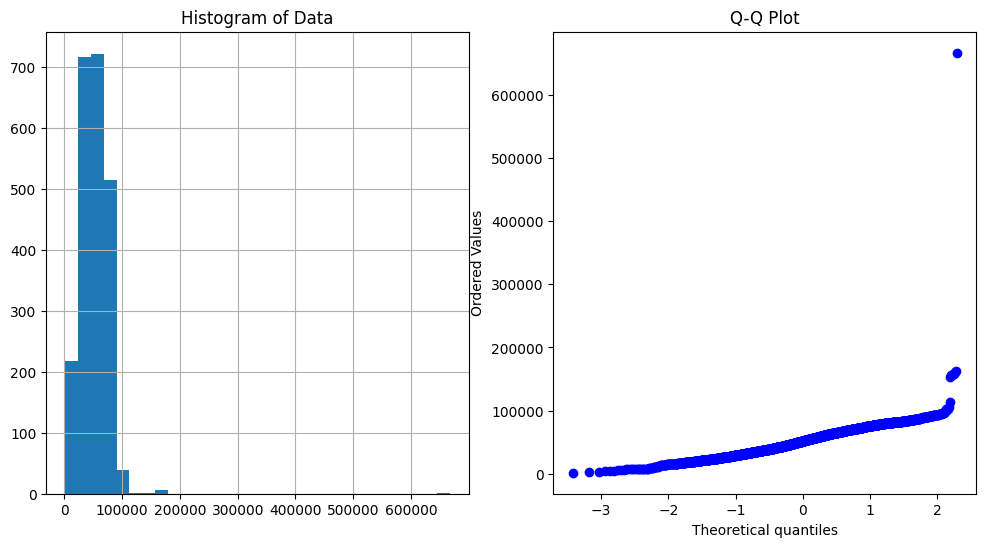

In [201]:
from scipy.stats import shapiro, kstest, normaltest

collumn = 'income'

# Check distribution normality using Shapiro-Wilk test
shapiro_test = shapiro(df[collumn])
print('Shapiro-Wilk Test:')
print(f'Statistic: {shapiro_test[0]}')
print(f'p-value: {shapiro_test[1]}')
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Sample Normal')
else:
    print('Sample Not Normal')

# Check distribution normality using Kolmogorov-Smirnov test
ks_test = kstest(df[collumn], 'norm')
print('\nKolmogorov-Smirnov Test:')
print(f'Statistic: {ks_test.statistic}')
print(f'p-value: {ks_test.pvalue}')
if ks_test.pvalue > alpha:
    print('Sample Normal')
else:
    print('Sample Not Normal')

# Check distribution normality using normaltest
normal_test = normaltest(df[collumn])
print('\nNormal Test:')
print(f'Statistic: {normal_test.statistic}')
print(f'p-value: {normal_test.pvalue}')
if normal_test.pvalue > alpha:
    print('Sample Normal')
else:
    print('Sample Not Normal')

# Visual inspection using histograms and Q-Q plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[collumn].hist(bins=30)
plt.title('Histogram of Data')
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(df[collumn], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

As you can see the data not normally distributed, so i will use median to fill the missing value<br><br>

but before that, i want to use method Mean/Median/Mode Imputation <br> 
so not just blindly fill the missing value with median from column income <br> 
but also from other categorical column like education, and marital status.<br><br>

(1) So first i will find median for every single combination of the group education and marital status

In [202]:
# find data that have missing values but only show education, maritalstatus, income, and median column which is the median value of every single combination of groupby columns
df[df['income'].isna()][['id','education', 'maritalstatus', 'income']].merge(df.groupby(['education', 'maritalstatus'])['income'].median(), on=['education', 'maritalstatus'], suffixes=('_original', '_median'))

,id,education,maritalstatus,income_original,income_median
0,12244,Graduation,Married,NaN,50737.0
1,13716,Graduation,Married,NaN,50737.0
2,12339,Graduation,Married,NaN,50737.0
3,12850,Graduation,Married,NaN,50737.0
4,12533,Graduation,Single,NaN,49973.5
5,13713,Graduation,Single,NaN,49973.5
6,13836,Graduation,Single,NaN,49973.5
7,12535,Graduation,Single,NaN,49973.5
8,12423,Graduation,Single,NaN,49973.5
9,12485,Graduation,Single,NaN,49973.5


<Axes: >

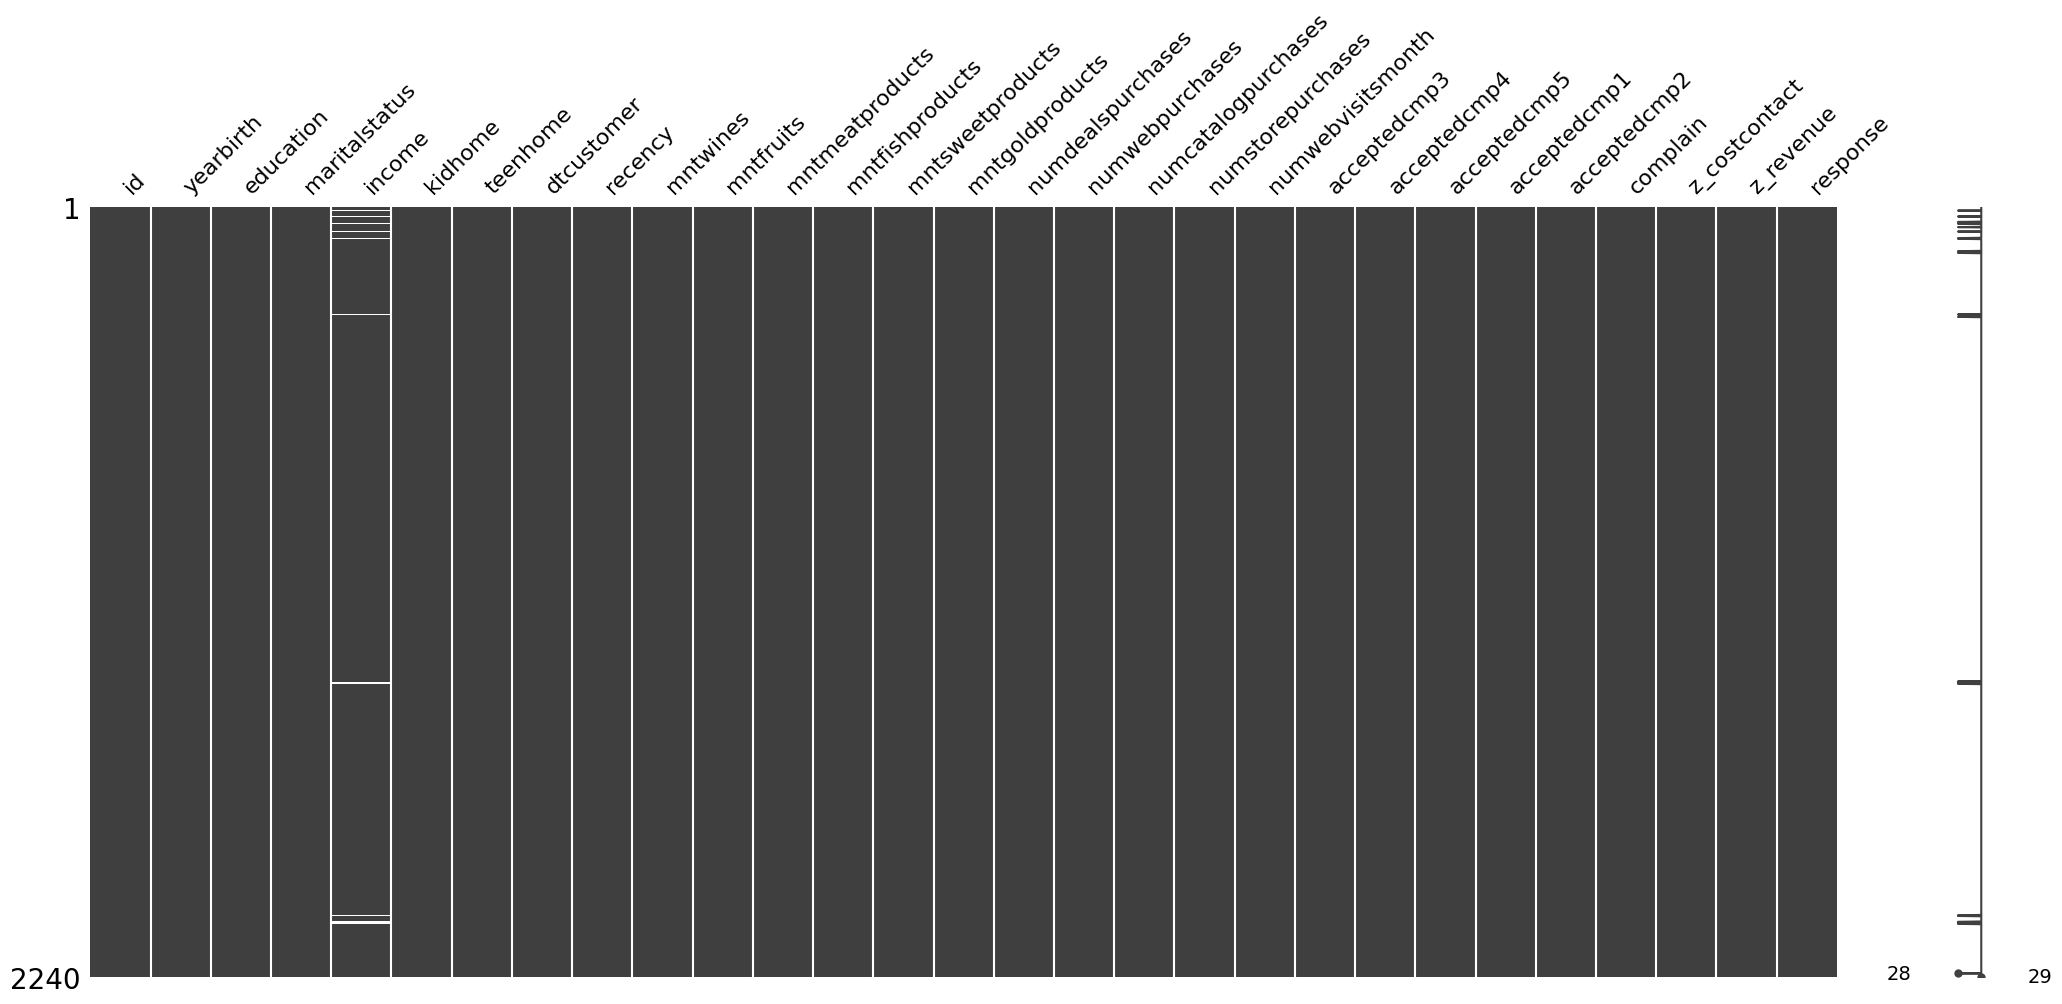

In [203]:
msno.matrix(df)

In [204]:
print(len(df[df['income'] == 50737.0]))

1


(2) Then i will fill the missing value with the median from the combination of education and marital status

In [205]:
# fill missing values from income original column with median value from income median column
df['income'] = df['income'].fillna(df.groupby(['education', 'maritalstatus'])['income'].transform('median'))

(3) Check the data that already filled is it true or not?

In [206]:
data_testing = df[['id','maritalstatus','education','income']].query('education == "Graduation" & maritalstatus == "Married"').sort_values(by='income') 

# show data where income = '50737.0'
print(len(data_testing[data_testing['income'] == 50737.0]))

5


As you can see the output change where data with income "50737" change from only 1 data to 5 data

<Axes: >

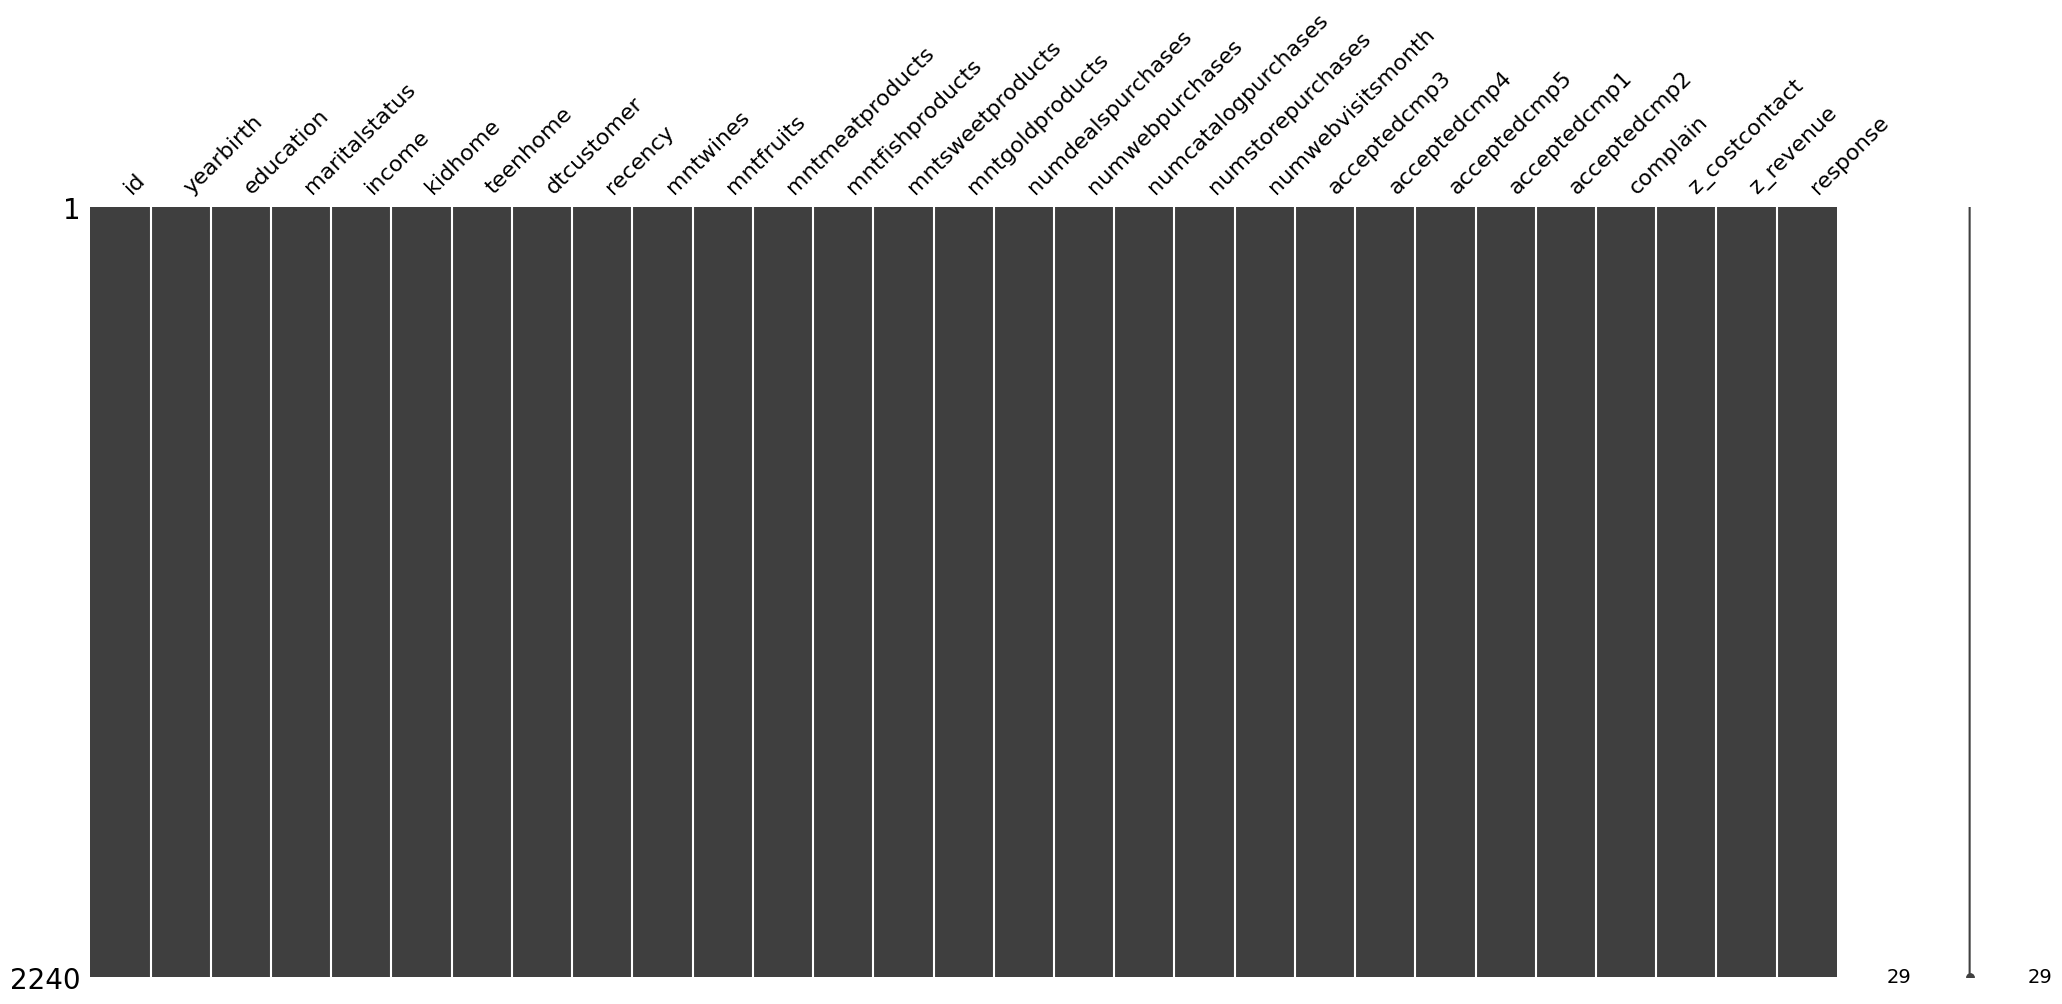

In [207]:
msno.matrix(df)

## Handling Duplicate Values

In [208]:
# check for duplicate data excluding 'id' column using difference method
duplicate_rows = df[df.duplicated(subset=df.columns.difference(['id']))]

# sort by yearbirth column
duplicate_rows = duplicate_rows.sort_values(by=['yearbirth', 'education', 'maritalstatus', 'income'])

# print the duplicate rows
print(f"Jumlah Data Asli : {len(df)}")
print(f"Jumlah Data Duplikat : {len(duplicate_rows)}")
print(f"Percentage : {len(duplicate_rows)/len(df)*100:.2f}%")
duplicate_rows.head(10)

Jumlah Data Asli : 2240
Jumlah Data Duplikat : 182
Percentage : 8.12%


,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
894,13606,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1
282,13508,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
1747,13853,1946,Master,Married,66835.0,0,0,2013-09-28,21,620,26,195,34,17,141,1,6,4,13,2,0,0,0,0,0,0,3,11,0
1771,12004,1946,PhD,Married,51012.0,0,0,2013-04-18,86,102,9,63,2,9,24,1,4,1,4,6,0,0,0,0,0,0,3,11,0
1570,13087,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
2236,13074,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
1630,13771,1947,PhD,Together,73059.0,0,1,2013-08-31,36,410,112,420,0,82,71,1,9,3,13,4,0,0,0,0,0,0,3,11,0
1634,10906,1948,PhD,Together,46681.0,0,2,2013-10-08,52,269,15,69,15,19,38,2,4,6,4,5,0,0,0,0,0,0,3,11,0
2217,12871,1948,PhD,Widow,82032.0,0,0,2014-04-05,54,332,194,377,149,125,57,0,4,6,7,1,0,0,0,0,0,0,3,11,0
2094,13908,1949,Master,Together,49912.0,0,1,2012-09-07,5,520,8,223,32,49,42,4,10,5,7,8,1,0,0,0,0,0,3,11,1


<!-- For that i will time its value for column: <br>
- mntfishproducts 
- mntmeatproducts 
- mntfruits
- mntsweetproducts
- mntwines
- mntgoldprods
- numdealspurchases
- numcatalogpurchases
- numstorepurchases
- numwebpurchases
- numwebvisitsmonth<br><br>

with number times based on how much data that duplicate <br>
if there is only 1 data that duplicate, i will times it with 2 <br>
if there is 2 data that duplicate, i will times it with 3 <br>
if there is 3 data that duplicate, i will times it with 4 <br> -->

I just gonna leave it because this supermarket customer behaviour so sometimes they buy the same product in the same amount at the same time

In [209]:
# drop duplicate data
df = df.drop_duplicates(subset=df.columns.difference(['id']), keep='first')
len(df)

2058

## Handling Outlier

I Only Handle 
- yearbirth 
- income
- recency
- mntwines
- mntfruits
- mntmeatproducts
- mntfishproducts
- mntsweetproducts
- mntgoldproducts
- numdealspurchases
- numwebpurchases
- numcatalogpurchases
- numstorepurchases
- numwebvisitsmonth

Because This Data is the most important data for me to analyze the outlier

Jumlah outlier yearbirth(True) : 3(0.1%)
Jumlah outlier income(True) : 8(0.4%)
Jumlah outlier recency(True) : 0(0.0%)
Jumlah outlier mntwines(True) : 33(1.6%)
Jumlah outlier mntfruits(True) : 207(10.1%)
Jumlah outlier mntmeatproducts(True) : 174(8.5%)
Jumlah outlier mntfishproducts(True) : 203(9.9%)
Jumlah outlier mntsweetproducts(True) : 225(10.9%)
Jumlah outlier mntgoldproducts(True) : 187(9.1%)
Jumlah outlier numdealspurchases(True) : 78(3.8%)
Jumlah outlier numwebpurchases(True) : 4(0.2%)
Jumlah outlier numcatalogpurchases(True) : 22(1.1%)
Jumlah outlier numstorepurchases(True) : 0(0.0%)
Jumlah outlier numwebvisitsmonth(True) : 8(0.4%)


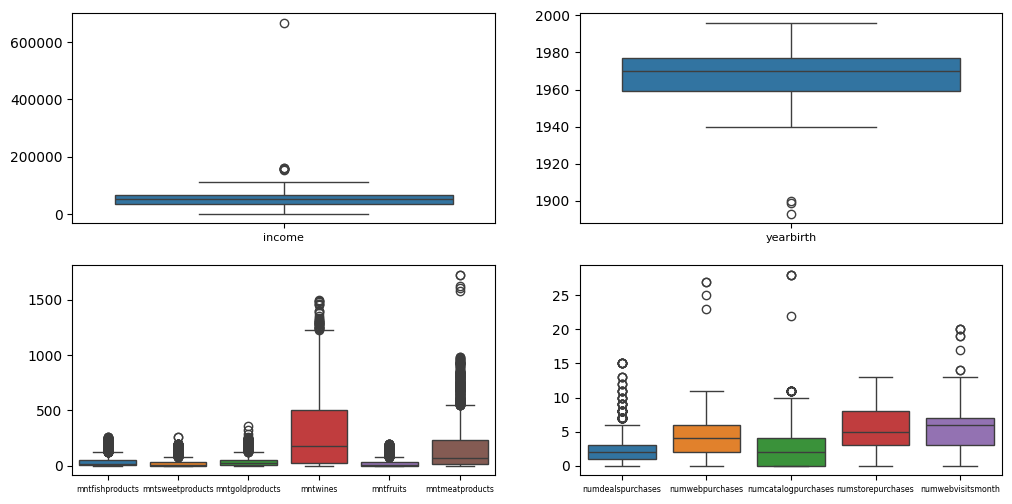

In [210]:
# Check Outlier For Each Column with IQR
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

data_checking = check_outlier(df[['yearbirth', 'income',
       'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']])

# only show data if the value for one or more columns is True
data_outlier = pd.DataFrame(data_checking[data_checking.any(axis=1)])

# add column to indicate which column(s) have an outlier
data_outlier['outlier_column'] = data_checking[data_checking.any(axis=1)].apply(lambda x: ','.join(x.index[x]), axis=1)

# Looping to show the number of outliers for each column
for col in data_outlier.columns:
    if col != 'outlier_column':
        print(f"Jumlah outlier {col}(True) : {len(data_outlier[data_outlier[col] == True])}({len(data_outlier[data_outlier[col] == True])/len(df)*100:.1f}%)")

# data_outlier.head(1)

data_presentation = df[['yearbirth', 'income','recency', 'mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldproducts', 'numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
box_plot1 = sns.boxplot(data=data_presentation[['income']])
box_plot1.set_xticklabels(box_plot1.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 2)
box_plot2 = sns.boxplot(data=data_presentation[['yearbirth']])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 3)
box_plot3 = sns.boxplot(data=data_presentation[['mntfishproducts', 'mntsweetproducts','mntgoldproducts','mntwines','mntfruits','mntmeatproducts']])
box_plot3.set_xticklabels(box_plot3.get_xticklabels(), fontsize=5.5)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 4)
box_plot4 = sns.boxplot(data=data_presentation[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']])
box_plot4.set_xticklabels(box_plot4.get_xticklabels(), fontsize=5.7)  # Adjust the fontsize as per your requirement

plt.show()

Define a Statistic Descriptive For Each Column

In [211]:
df[['yearbirth', 'income','recency', 'mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldproducts', 'numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']].describe()

,yearbirth,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,1968.787172,52339.750729,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728
std,11.973898,25379.898874,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35701.750000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51371.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68242.500000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


### `Yearbirth`

In [212]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

len(find_outlier(df, 'yearbirth'))

3

I will use Median Method for column **yearbirth** Based On Education and Marital Status to replace the outlier<br><br>
(1) First i will find median for every single combination of the group education and marital status

In [213]:
# find data that have yearbirth < 1935 but only show education, maritalstatus, income, and median column which is the median value of every single combination of groupby columns
df[df['yearbirth'] < 1935][['id','education', 'maritalstatus', 'mntwines', 'yearbirth']].merge(df.groupby(['education', 'maritalstatus'])['yearbirth'].median(), on=['education', 'maritalstatus'], suffixes=('_original', '_median'))

,id,education,maritalstatus,mntwines,yearbirth_original,yearbirth_median
0,12118,2n Cycle,Divorced,15,1900,1965.0
1,11004,2n Cycle,Single,8,1893,1978.0
2,13230,PhD,Together,755,1899,1967.0


In [214]:
# check result of data where yearbirth == 1965
len(df[df['yearbirth'] == 1965])

66

(2) Then i will replace the outlier with the median from the combination of education and marital status

In [215]:
# replace the outlier with the median from the combination of education and marital status
df.loc[df['yearbirth'] < 1935, 'yearbirth'] = df.groupby(['education', 'maritalstatus'])['yearbirth'].transform('median')

(3) Check the data that already filled is it true or not?

In [216]:
# check result of data where yearbirth == 1965
len(df[df['yearbirth'] == 1965])

67

See There is Increase Data at **df[df['yearbirth'] == 1965]** Where Before is 74 and After is 75

### `Income`

In [217]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

len(find_outlier(df, 'income'))

8

In [218]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

income = find_non_outlier(df, 'income')

# # check max value based on education and maritalstatus
# income[['education', 'maritalstatus', 'income']].groupby(['education', 'maritalstatus']).max()

In [219]:
max_income = income['income'].max()
# Set Data Base On Max Value From Table Above
len(df[df['income'] == max_income])

1

In [220]:
# Replace Outlier With Max Value
df.loc[df['income'] > max_income, 'income'] = max_income

len(df[df['income'] == max_income])

9

See There is Increase Data Where Before is 1 and After is 9 Because 8 Data Outlier is Replaced with Max Value Non Outlier Data

### `Mnt Column`

In [221]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

wines = find_non_outlier(df, 'mntwines')
fruits = find_non_outlier(df, 'mntfruits')
meatproducts = find_non_outlier(df, 'mntmeatproducts')
fishproducts = find_non_outlier(df, 'mntfishproducts')
sweetproducts = find_non_outlier(df, 'mntsweetproducts')
goldproducts = find_non_outlier(df, 'mntgoldproducts')

I will use the same method at the income column<br>
- mntwines

In [222]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'mntwines')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
111,12215,1991,PhD,Single,68126.0,0,0,2012-11-10,40,1332,17,311,23,51,86,1,7,4,5,9,0,1,0,0,0,0,3,11,1


In [223]:
max_mntwines = wines['mntwines'].max()
# Set Data Base On Max Value From Table Above
len(df[df['mntwines'] == max_mntwines])

1

In [224]:
# Replace Outlier With Max Value
df.loc[df['mntwines'] > max_mntwines, 'mntwines'] = max_mntwines

len(df[df['mntwines'] == max_mntwines])

34

- mntfruits

In [225]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'mntfruits')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [226]:
max_mntfruits = fruits['mntfruits'].max()
# Set Data Base On Max Value From Table Above
len(df[df['mntfruits'] == max_mntfruits])

5

In [227]:
# Replace Outlier With Max Value
df.loc[df['mntfruits'] > max_mntfruits, 'mntfruits'] = max_mntfruits

len(df[df['mntfruits'] == max_mntfruits])

212

- mntmeatproducts

In [228]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'mntmeatproducts')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
21,13331,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0


In [229]:
max_mntmeatproducts = meatproducts['mntmeatproducts'].max()
# Set Data Base On Max Value From Table Above
len(df[df['mntmeatproducts'] == max_mntmeatproducts])

2

In [230]:
# Replace Outlier With Max Value
df.loc[df['mntmeatproducts'] > max_mntmeatproducts, 'mntmeatproducts'] = max_mntmeatproducts

len(df[df['mntmeatproducts'] == max_mntmeatproducts])

176

- mntfishproducts

In [231]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'mntfishproducts')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,81,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [232]:
max_mntfishproducts = fishproducts['mntfishproducts'].max()
# Set Data Base On Max Value From Table Above
len(df[df['mntfishproducts'] == max_mntfishproducts])

5

In [233]:
# Replace Outlier With Max Value
df.loc[df['mntfishproducts'] > max_mntfishproducts, 'mntfishproducts'] = max_mntfishproducts

len(df[df['mntfishproducts'] == max_mntfishproducts])

208

- mntsweetproducts

In [234]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'mntsweetproducts')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,12618,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,81,546,120,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1


In [235]:
max_mntsweetproducts = sweetproducts['mntsweetproducts'].max()
# Set Data Base On Max Value From Table Above
len(df[df['mntsweetproducts'] == max_mntsweetproducts])

3

In [236]:
# Replace Outlier With Max Value
df.loc[df['mntsweetproducts'] > max_mntsweetproducts, 'mntsweetproducts'] = max_mntsweetproducts

len(df[df['mntsweetproducts'] == max_mntsweetproducts])

228

- mntgoldproducts

In [237]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'mntgoldproducts')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
18,12755,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0


In [238]:
max_mntgoldproducts = goldproducts['mntgoldproducts'].max()
# Set Data Base On Max Value From Table Above
len(df[df['mntgoldproducts'] == max_mntgoldproducts])

6

In [239]:
# Replace Outlier With Max Value
df.loc[df['mntgoldproducts'] > max_mntgoldproducts, 'mntgoldproducts'] = max_mntgoldproducts

len(df[df['mntgoldproducts'] == max_mntgoldproducts])

193

### `Num Column`

In [240]:
# check every single column has outlier or not with IQR method
def find_non_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    non_outlier = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return non_outlier

dealspurchases = find_non_outlier(df, 'numdealspurchases')
webpurchases = find_non_outlier(df, 'numwebpurchases')
catalogpurchases = find_non_outlier(df, 'numcatalogpurchases')
storepurchases = find_non_outlier(df, 'numstorepurchases')
webvisitsmonth = find_non_outlier(df, 'numwebvisitsmonth')

There is no outlier in the **numstorepurchases** column, so i will not handle it<br>
I will use method that use in the income column<br>
- numdealspurchases

In [241]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'numdealspurchases')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
21,13331,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,549,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0


In [242]:
max_numdealspurchases = dealspurchases['numdealspurchases'].max()
# Set Data Base On Max Value From Table Above
len(df[df['numdealspurchases'] == max_numdealspurchases])

58

In [243]:
# Replace Outlier With Max Value
df.loc[df['numdealspurchases'] > max_numdealspurchases, 'numdealspurchases'] = max_numdealspurchases

len(df[df['numdealspurchases'] == max_numdealspurchases])

136

- numwebpurchases

In [244]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'numwebpurchases')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
27,12533,1986,Graduation,Single,49973.5,1,0,2013-02-20,19,5,1,3,3,82,126,0,27,0,0,1,0,0,0,0,0,0,3,11,0


In [245]:
max_numwebpurchases = webpurchases['numwebpurchases'].max()
# Set Data Base On Max Value From Table Above
len(df[df['numwebpurchases'] == max_numwebpurchases])

42

In [246]:
# Replace Outlier With Max Value
df.loc[df['numwebpurchases'] > max_numwebpurchases, 'numwebpurchases'] = max_numwebpurchases

len(df[df['numwebpurchases'] == max_numwebpurchases])

46

- numcatalogpurchases

In [247]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'numcatalogpurchases')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
21,13331,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,549,1,1,1,6,0,28,0,1,0,0,0,0,0,0,3,11,0


In [248]:
max_numcatalogpurchases = catalogpurchases['numcatalogpurchases'].max()
# Set Data Base On Max Value From Table Above
len(df[df['numcatalogpurchases'] == max_numcatalogpurchases])

44

In [249]:
# Replace Outlier With Max Value
df.loc[df['numcatalogpurchases'] > max_numcatalogpurchases, 'numcatalogpurchases'] = max_numcatalogpurchases

len(df[df['numcatalogpurchases'] == max_numcatalogpurchases])

66

- numwebvisitsmonth

In [250]:
# check every single column has outlier or not with IQR method
def find_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outlier

result = find_outlier(df, 'numwebvisitsmonth')
result.head(1)

,id,yearbirth,education,maritalstatus,income,kidhome,teenhome,dtcustomer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
9,13059,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [251]:
max_numwebvisitsmonth = webvisitsmonth['numwebvisitsmonth'].max()
# Set Data Base On Max Value From Table Above
len(df[df['numwebvisitsmonth'] == max_numwebvisitsmonth])

1

In [252]:
# Replace Outlier With Max Value
df.loc[df['numwebvisitsmonth'] > max_numwebvisitsmonth, 'numwebvisitsmonth'] = max_numwebvisitsmonth

len(df[df['numwebvisitsmonth'] == max_numwebvisitsmonth])

9

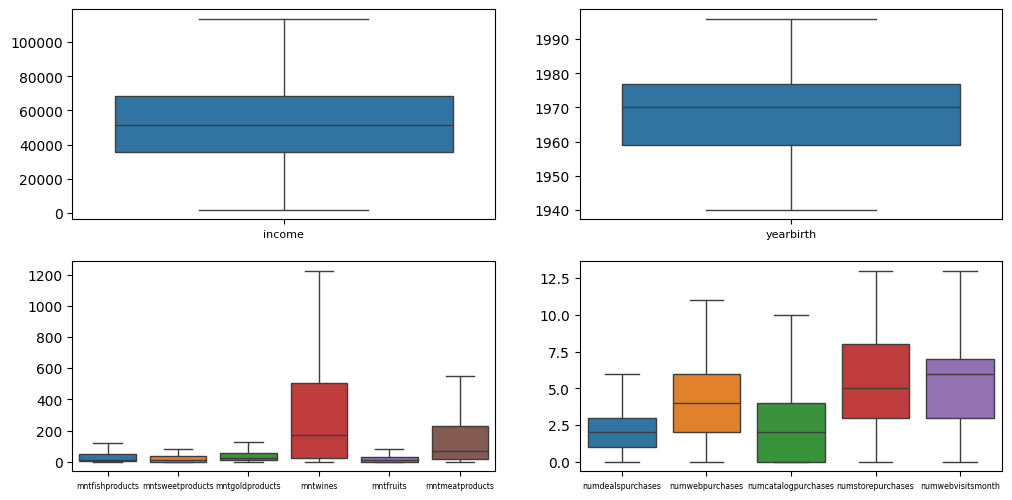

In [253]:
data_presentation = df[['yearbirth', 'income','recency', 'mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldproducts', 'numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
box_plot1 = sns.boxplot(data=data_presentation[['income']])
box_plot1.set_xticklabels(box_plot1.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 2)
box_plot2 = sns.boxplot(data=data_presentation[['yearbirth']])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=8)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 3)
box_plot3 = sns.boxplot(data=data_presentation[['mntfishproducts', 'mntsweetproducts','mntgoldproducts','mntwines','mntfruits','mntmeatproducts']])
box_plot3.set_xticklabels(box_plot3.get_xticklabels(), fontsize=5.5)  # Adjust the fontsize as per your requirement

plt.subplot(2, 2, 4)
box_plot4 = sns.boxplot(data=data_presentation[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']])
box_plot4.set_xticklabels(box_plot4.get_xticklabels(), fontsize=5.7)  # Adjust the fontsize as per your requirement

plt.show()

## Save Data

In [254]:
df.to_csv('../data/mid/Supermarket Customers.csv', index=False)